In [81]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [82]:
timesteps = 9
probs_set = np.array([1,2,3,4,5,4,3,2,1])
probability = np.zeros((timesteps,len(probs_set)))
cumsum = np.zeros((timesteps+1,len(probs_set)))
cumsum = list(cumsum)
for i,p in enumerate(probs_set):
    probability[i,:] = probs_set/sum(probs_set)
    if i == 0:
        continue
    else:
        print(i)
        cumsum[i-1] =  list(np.cumsum(probs_set[i:]/sum(probs_set[i:])))
    probs_set[i] = 0
    

1
2
3
4
5
6
7
8


In [83]:
t = np.arange(0,1000,1)
pdf = stats.norm.pdf()

TypeError: pdf() missing 1 required positional argument: 'x'

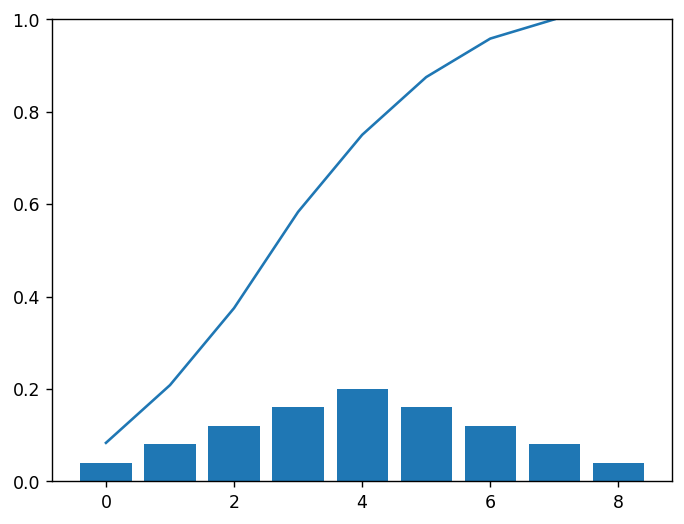

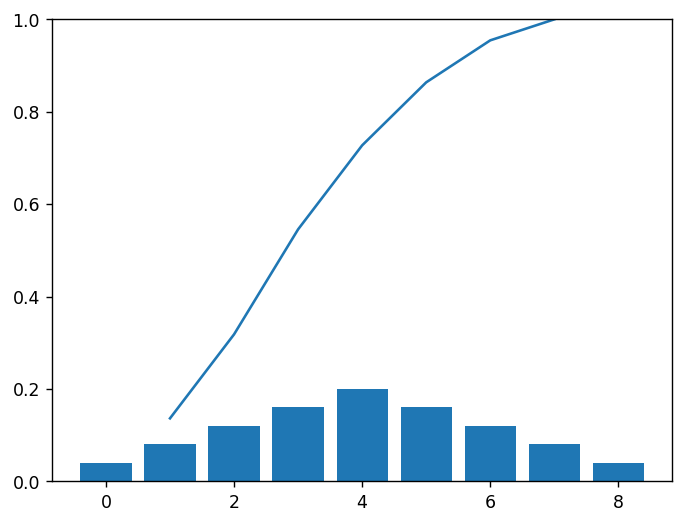

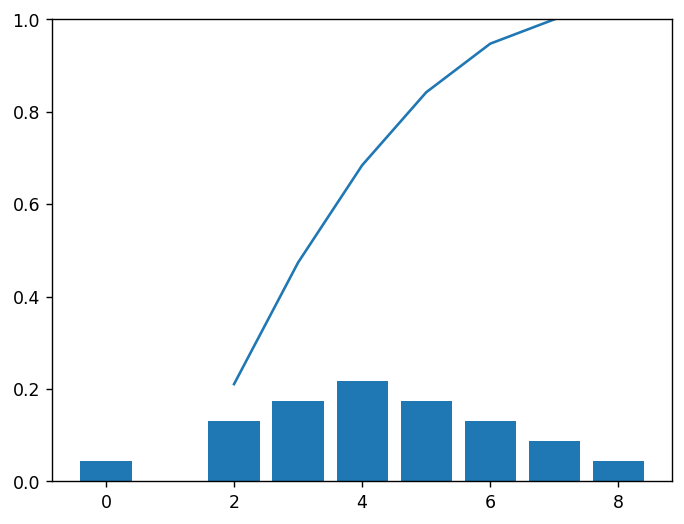

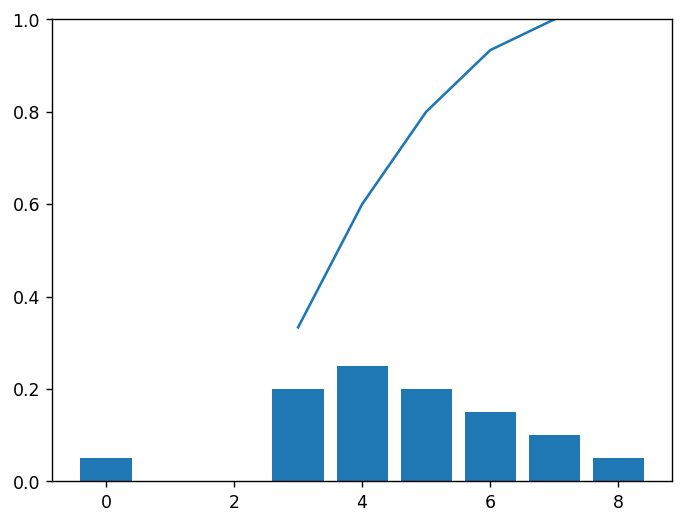

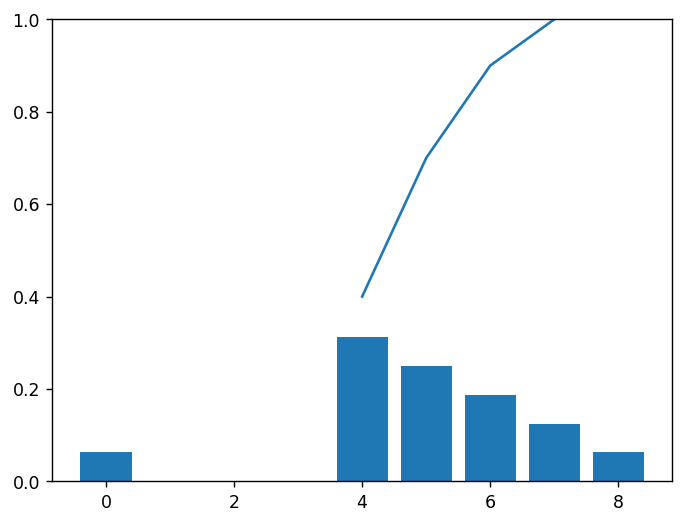

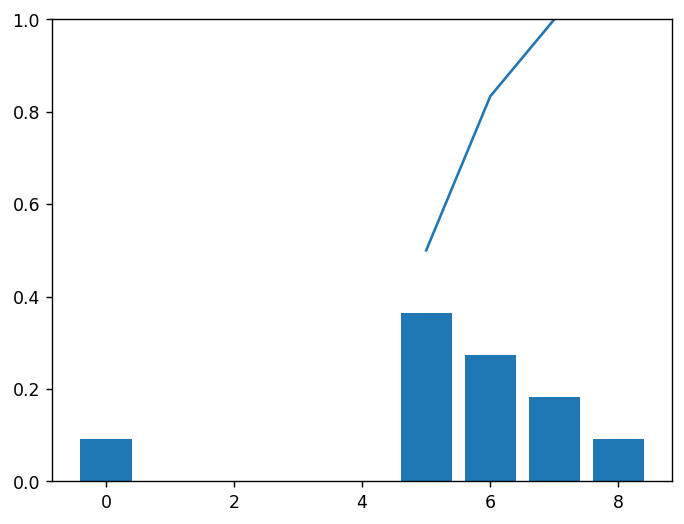

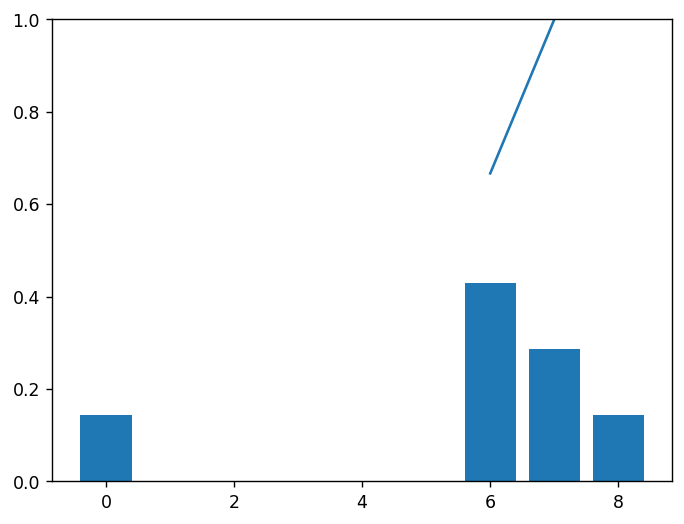

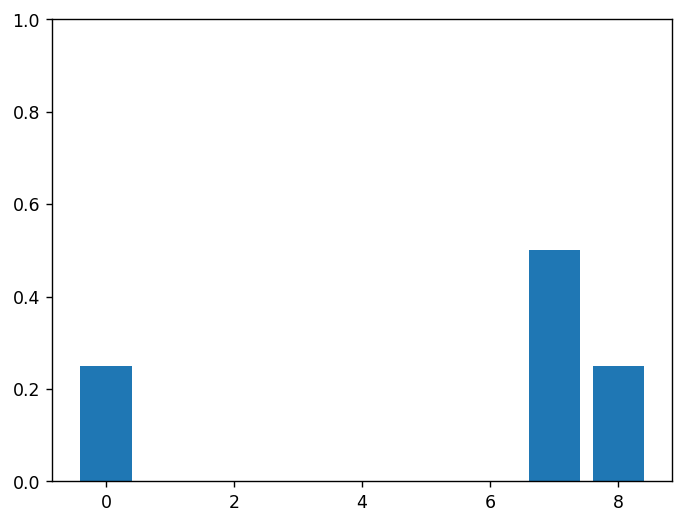

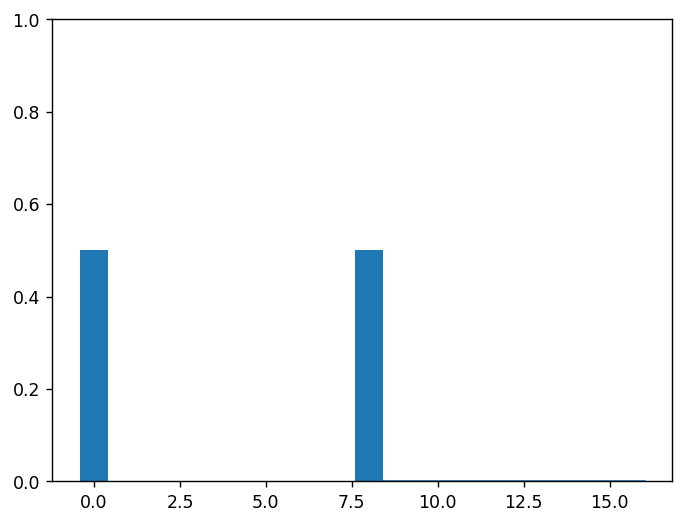

In [ ]:
xlocs = np.arange(0,timesteps,1)
timesteps_left = 9
for i in range(timesteps):
    prob_removed = probability[i:,:]
    fig,ax = plt.subplots(dpi=125)
    ax.bar(xlocs,probability[i,:])
    ax.plot(np.arange(i,len(cumsum[i])+i,1),cumsum[i])
    ax.set_ylim(0,1)


In [ ]:
timesteps = 9
probs_set = np.array([1,2,3,4,5,4,3,2,1])
probability = np.zeros((timesteps,len(probs_set)))
cumsum = np.zeros((timesteps,len(probs_set)))

for i,p in enumerate(probs_set):
    probability[i,:] = probs_set/sum(probs_set)
    cumsum[i,:] =  1-np.cumsum(probability[i,:])

In [ ]:
((0.5)/(0.75))*0.25 + 0.5

0.6666666666666666

In [ ]:
def calculate(last,current):
    ans = current + last*(current/(1-last))
    return ans

In [ ]:
bins = [0.1,0.2,0.4,0.2,0.1]
bin_lost_index = 0
new_bins1 = []
for b in range(1,len(bins)):
    new_bins1.append(calculate(bins[bin_lost_index],bins[b]))
new_bins1

[0.22222222222222224,
 0.4444444444444445,
 0.22222222222222224,
 0.11111111111111112]

In [ ]:
new_bins2 = []
for b in range(1,len(new_bins1)):
    new_bins2.append(calculate(new_bins1[bin_lost_index],new_bins1[b]))
new_bins2

[0.5714285714285715, 0.28571428571428575, 0.14285714285714288]

In [ ]:
new_bins3 = []
for b in range(1,len(new_bins2)):
    new_bins3.append(calculate(new_bins2[bin_lost_index],new_bins2[b]))
new_bins3

[0.6666666666666669, 0.3333333333333334]

In [ ]:
new_bins4 = []
for b in range(1,len(new_bins3)):
    new_bins4.append(calculate(new_bins3[bin_lost_index],new_bins3[b]))
new_bins4

[1.0000000000000009]

In [ ]:
bins_each_iter = []
new_bins = [0.1,0.2,0.4,0.2,0.1]
bins = new_bins
while len(bins) != 1:
    bins_each_iter.append(new_bins)
    bins = new_bins
    new_bins = []
    for b in range(1,len(bins)):
        new_bins.append(calculate(bins[0],bins[b]))


In [ ]:
bins_each_iter = []
timestep_list = []
timesteps = np.arange(0,2000,1)
new_bins = stats.norm.pdf(timesteps,1000,50)
bins = new_bins
c = -1
while len(bins) != 1:
    c+=1
    timestep_list.append(np.arange(c,2000,1))
    bins_each_iter.append(np.array(new_bins))
    bins = new_bins
    new_bins = []
    for b in range(1,len(bins)):
        new_bins.append(calculate(bins[0],bins[b]))

In [ ]:
bins_each_iter[1998]

array([9.04301673e-74, 6.06535351e-74])

(0.0, 0.1)

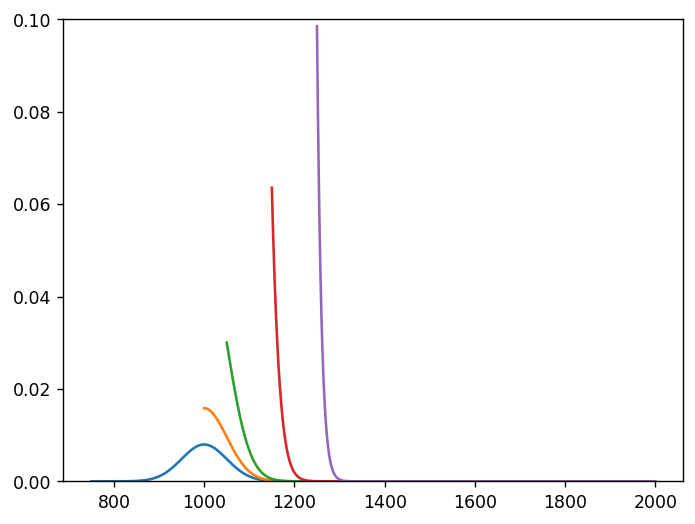

In [ ]:
fig,ax = plt.subplots(dpi=125)
num = 1000
ax.plot(timestep_list[750],bins_each_iter[750])
ax.plot(timestep_list[num],bins_each_iter[num])
ax.plot(timestep_list[1050],bins_each_iter[1050])
ax.plot(timestep_list[1150],bins_each_iter[1150])
ax.plot(timestep_list[1250],bins_each_iter[1250])
ax.set_ylim(0,0.1)

In [ ]:
mu = 1999/2000
sigma = np.sqrt(mu*(1-mu))
alpha = -(mu*(sigma**2 + mu**2 - mu ))/sigma
beta = ((mu-1)*(sigma**2 + mu**2 - mu ))/sigma

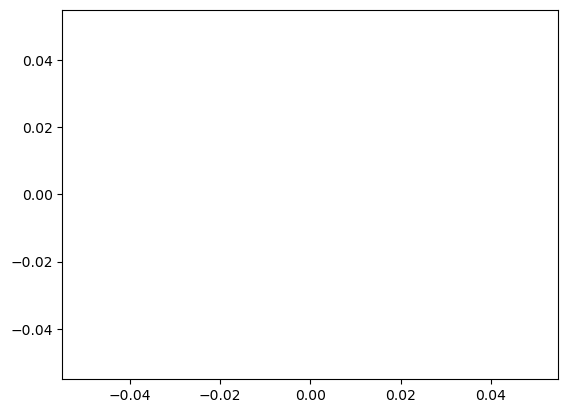

In [ ]:
x = np.arange(0,2000,1)
pdf = stats.beta.pdf(x,alpha,beta)
plt.figure()
plt.plot(x,pdf)

So I can use the pdf of the normal distribution for the lambda of the poisson

and before, I updated the pdf of the normal based on each timestep that passed

So now I want to do that timestep removal thing and get the pdf of the current timestep from that above

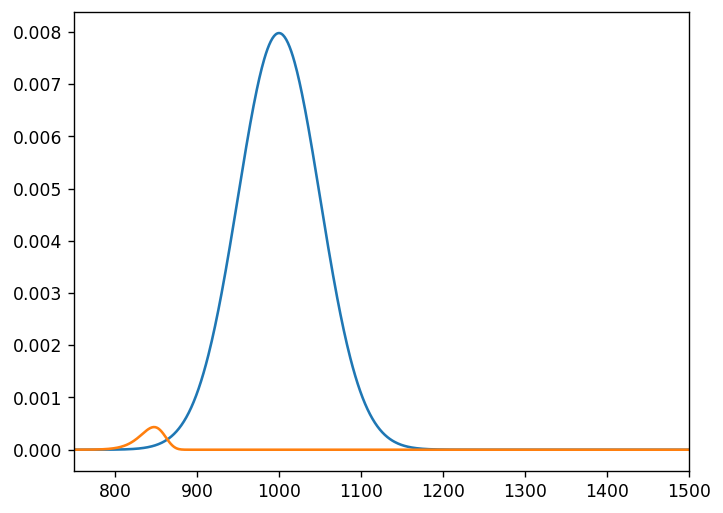

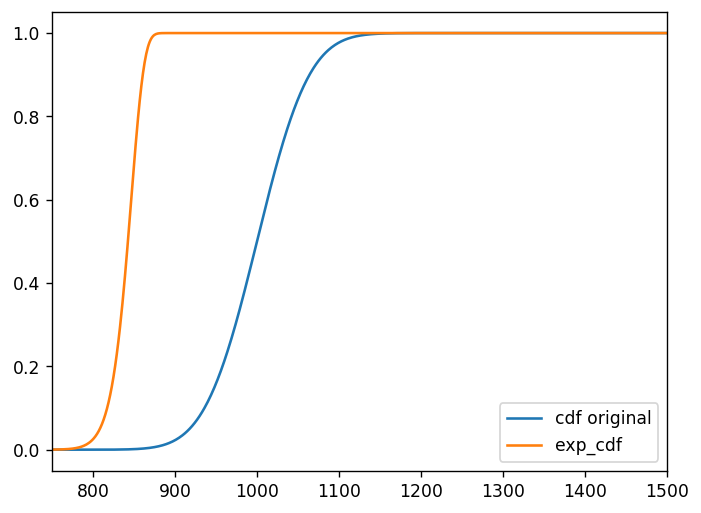

In [105]:
r = stats.norm.rvs(1000,50,100000)
t = np.arange(0,2000,1)
pdf_original = stats.norm.pdf(t,1000,50)
cdf_original = stats.norm.cdf(t,1000,50)

# Pdfs from bins
pdf = np.zeros((len(t)))
for i,binn in enumerate(bins_each_iter):
    pdf[i] = binn[0]

poisson = ((pdf**1)/np.math.factorial(1))*np.e**(-pdf)
exp_pdf = pdf_original*np.e**(-pdf_original*t)
exp_cdf = 1- np.e**(-pdf_original*t)
fig,ax = plt.subplots(dpi=124)
# ax.hist(r,bins = 1000,density=True)
# ax.plot(t+10,pdf,label='updated pdf')
ax.plot(t,pdf_original,label='pdf original')
# ax.plot(t,poisson,label = 'poisson')
ax.plot(t,exp_pdf,label = 'exp_pdf')
ax.set_xlim(750,1500)

fig,ax = plt.subplots(dpi=124)
# ax.hist(r,bins = 1000,density=True)
# ax.plot(t+10,pdf,label='updated pdf')
ax.plot(t,cdf_original,label='cdf original')
# ax.plot(t,poisson,label = 'poisson')
ax.plot(t,exp_cdf,label = 'exp_cdf')
ax.set_xlim(750,1500)
ax.legend()
plt.show()

In [92]:
# Calculate the sum from each timestep on 
sums = np.zeros(len(t))
for i in range(len(t)):
    sums[i] = np.sum(pdf[i:i+1])

So summing up each delta t gave me back the PDF? I'm missing something.... is the big plots above the CDF at every point? Can't be...

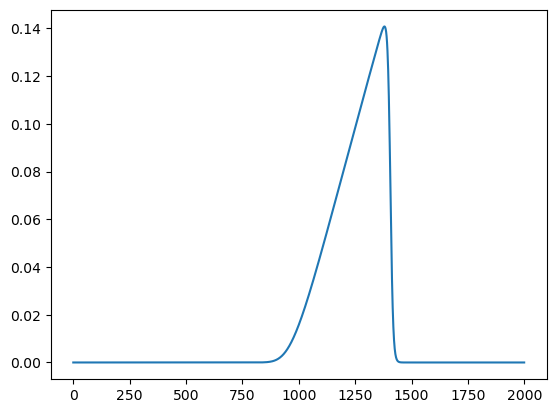

In [93]:
plt.plot(sums)

Reaction Distribution 

64.03124237432849

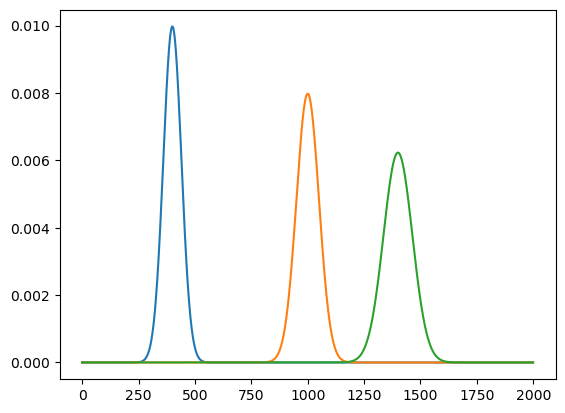

In [113]:
react = stats.norm.pdf(t,400,40)
agent = stats.norm.pdf(t,1000,50)
react_plus_agent = stats.norm.pdf(t,1400,np.sqrt(40**2 + 50**2))

fig,ax = plt.subplots()
ax.plot(t,react,label='react')
ax.plot(t,agent,label='agent')
ax.plot(t,react_plus_agent,label='react_plus_agent')


Prob of Reacting and Making It

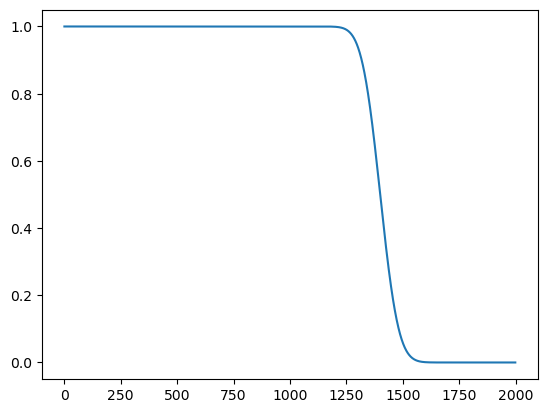

In [120]:
react_plus_agent_cdf = 1 - stats.norm.cdf(t,1300,np.sqrt(40**2 + 50**2))
fig,ax = plt.subplots()
ax.plot(t,react_plus_agent_cdf)

In [ ]:
agent_trunc_mean at every timestep

get the reaction distribution around that mean 

determine probability of making it based on that distribution 




#### Negative Binomial Distribution